# 식물 분류 모델 학습

[참고] Leaf Disease Classification - Keras CNN .. With 96% Accuracy

Trained on kaggle notebook w. GPU P100

In [9]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [18]:
# Print all disease (class) names from the dataset
train_gen = image_dataset_from_directory(directory="/kaggle/input/plant-diseases-dataset-mod/plant_disease_detection_mod/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/kaggle/input/plant-diseases-dataset-mod/plant_disease_detection_mod/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))
print("Disease Classes in the Dataset:")
for idx, class_name in enumerate(train_gen.class_names):
    print(f"{idx}: {class_name}")


Found 62762 files belonging to 34 classes.
Found 15688 files belonging to 34 classes.
Disease Classes in the Dataset:
0: Apple___Black_rot
1: Apple___healthy
2: Blueberry___healthy
3: Cherry_(including_sour)___Powdery_mildew
4: Cherry_(including_sour)___healthy
5: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
6: Corn_(maize)___Common_rust_
7: Corn_(maize)___Northern_Leaf_Blight
8: Corn_(maize)___healthy
9: Grape___Black_rot
10: Grape___Esca_(Black_Measles)
11: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
12: Grape___healthy
13: Orange___Haunglongbing_(Citrus_greening)
14: Peach___Bacterial_spot
15: Peach___healthy
16: Pepper,_bell___Bacterial_spot
17: Pepper,_bell___healthy
18: Potato___Early_blight
19: Potato___Late_blight
20: Potato___healthy
21: Raspberry___healthy
22: Soybean___healthy
23: Squash___Powdery_mildew
24: Strawberry___Leaf_scorch
25: Strawberry___healthy
26: Tomato___Bacterial_spot
27: Tomato___Early_blight
28: Tomato___Late_blight
29: Tomato___Leaf_Mold
30: Tomato__

<h1>Data Loading</h1>
<p>Setting up Image Data Generators<p>

In [19]:
rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))
# Print all disease (class) names from the dataset

<h1>Modelling</h1>

In [20]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       7

In [28]:
ep = 10
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/10
1962/1962 [==============================] - 155s 79ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.1054 - val_accuracy: 0.9713
Epoch 2/10
1962/1962 [==============================] - 154s 78ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.1062 - val_accuracy: 0.9724
Epoch 3/10
1962/1962 [==============================] - 154s 79ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.1583 - val_accuracy: 0.9575
Epoch 4/10
1962/1962 [==============================] - 155s 79ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.1085 - val_accuracy: 0.9725
Epoch 5/10
1962/1962 [==============================] - 155s 79ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.1015 - val_accuracy: 0.9723
Epoch 6/10
1962/1962 [==============================] - 154s 79ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.1806 - val_accuracy: 0.9541
Epoch 7/10
1962/1962 [==============================] - 155s 79ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0

In [32]:
# 모델 저장
model.save("model.keras")
model.save_weights("model.weights.h5")

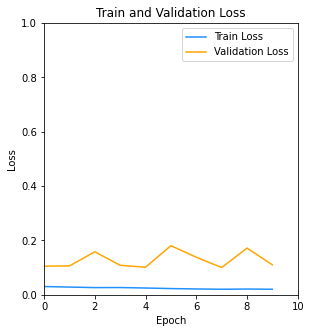

In [33]:
plt.figure(figsize=(10, 5))

# Plot for Loss
plt.subplot(1, 2, 1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Train Loss", color='dodgerblue')         # blue
plt.plot(history.history['val_loss'], label="Validation Loss", color='orange')    # orange
plt.xlim(0, 10)
plt.ylim(0.0, 1.0)
plt.legend()

<h1>Metrics</h1>

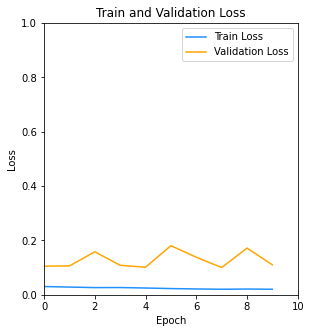

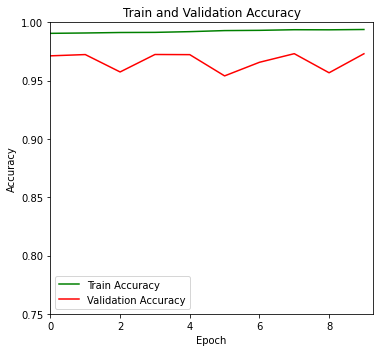

In [34]:
# plt.figure(figsize = (20,5))
# plt.subplot(1,2,1)
# plt.title("Train and Validation Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.plot(history.history['loss'],label="Train Loss")
# plt.plot(history.history['val_loss'], label="Validation Loss")
# plt.xlim(0, 10)
# plt.ylim(0.0,1.0)
# plt.legend()

# plt.subplot(1,2,2)
# plt.title("Train and Validation Accuracy")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.plot(history.history['accuracy'], label="Train Accuracy")
# plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
# plt.xlim(0, 9.25)
# plt.ylim(0.75,1.0)
# plt.legend()
# plt.tight_layout()
plt.figure(figsize=(10, 5))

# Plot for Loss
plt.subplot(1, 2, 1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Train Loss", color='dodgerblue')         # blue
plt.plot(history.history['val_loss'], label="Validation Loss", color='orange')    # orange
plt.xlim(0, 10)
plt.ylim(0.0, 1.0)
plt.legend()
plt.figure(figsize=(10, 5))
# Plot for Accuracy
plt.subplot(1, 2, 2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy", color='green')            # green
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='red')     # red
plt.xlim(0, 9.25)
plt.ylim(0.75, 1.0)
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [36]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [37]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.39 %
Test Accuracy   : 97.31 %
Precision Score : 97.31 %
Recall Score    : 97.31 %


In [39]:
# Disease-to-Pesticide mapping (simplified example, can be expanded or customized)
disease_to_pesticide = {
    "Apple___Black_rot": "Ziram, Captan",
    "Apple___healthy": "No pesticide needed",
    "Blueberry___healthy": "No pesticide needed",
    "Cherry_(including_sour)___Powdery_mildew": "Sulfur, Myclobutanil",
    "Cherry_(including_sour)___healthy": "No pesticide needed",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot": "Strobilurins",
    "Corn_(maize)___Common_rust_": "Propiconazole",
    "Corn_(maize)___Northern_Leaf_Blight": "Azoxystrobin",
    "Corn_(maize)___healthy": "No pesticide needed",
    "Grape___Black_rot": "Mancozeb, Captan",
    "Grape___Esca_(Black_Measles)": "No effective chemical control",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)": "Mancozeb",
    "Grape___healthy": "No pesticide needed",
    "Orange___Haunglongbing_(Citrus_greening)": "Vector control: Imidacloprid",
    "Peach___Bacterial_spot": "Copper-based sprays",
    "Peach___healthy": "No pesticide needed",
    "Pepper,_bell___Bacterial_spot": "Copper-based sprays",
    "Pepper,_bell___healthy": "No pesticide needed",
    "Potato___Early_blight": "Chlorothalonil, Mancozeb",
    "Potato___Late_blight": "Metalaxyl, Mancozeb",
    "Potato___healthy": "No pesticide needed",
    "Raspberry___healthy": "No pesticide needed",
    "Soybean___healthy": "No pesticide needed",
    "Squash___Powdery_mildew": "Sulfur, Neem oil",
    "Strawberry___Leaf_scorch": "Captan",
    "Strawberry___healthy": "No pesticide needed",
    "Tomato___Bacterial_spot": "Copper sprays",
    "Tomato___Early_blight": "Chlorothalonil, Mancozeb",
    "Tomato___Late_blight": "Metalaxyl",
    "Tomato___Leaf_Mold": "Copper-based fungicides",
    "Tomato___Septoria_leaf_spot": "Chlorothalonil",
    "Tomato___Spider_mites Two-spotted_spider_mite": "Insecticidal soap, Neem oil",
    "Tomato___Target_Spot": "Chlorothalonil",
    "Tomato___healthy": "No pesticide needed"
}


In [41]:
train_gen = image_dataset_from_directory(
    directory="/kaggle/input/plant-diseases-dataset-mod/plant_disease_detection_mod/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    image_size=(256, 256),
    shuffle=True
)
class_names = train_gen.class_names  # ✅ Save class names in a separate variable


Found 62762 files belonging to 34 classes.


# 실제 예측 수행

In [42]:
# from PIL import Image

# def predict_disease_and_recommend(image_path):
#     # Load and preprocess image
#     img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
#     img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
#     img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

#     # Predict
#     predictions = model.predict(img_array)
#     predicted_class = train_gen.class_names[np.argmax(predictions)]
#     pesticide = disease_to_pesticide.get(predicted_class, "No data available")
#     plt.figure(figsize=(6, 6))
#     plt.imshow(img)
#     plt.axis('off')
#     plt.title(f"Disease: {predicted_class}\nPesticide: {pesticide}",
#               fontsize=12, color='darkgreen', loc='center')
#     plt.tight_layout()
#     plt.show()

#     print(f"\n📷 Predicted Disease: {predicted_class}")
#     print(f"🧪 Recommended Pesticide: {pesticide}")
import matplotlib.pyplot as plt
from PIL import Image
import os

def predict_disease_and_recommend(image_path, save_output=True):
    # Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    pesticide = disease_to_pesticide.get(predicted_class, "No data available")

    # Display and save image with overlayed text
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Disease: {predicted_class}\nPesticide: {pesticide}",
              fontsize=12, color='darkgreen', loc='center')
    plt.tight_layout()

    if save_output:
        output_path = "prediction_output.png"
        plt.savefig(output_path)
        print(f"\n🖼️ Image saved to: {os.path.abspath(output_path)}")

    plt.show()



🖼️ Image saved to: /kaggle/working/prediction_output.png


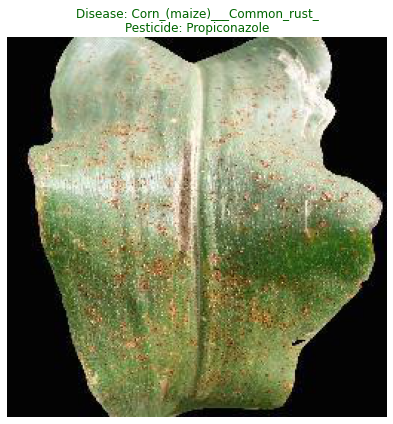

In [44]:
# Just call this function with the path to your image
predict_disease_and_recommend("/kaggle/input/plant-diseases-dataset-mod/plant_disease_detection_mod/test/test/CornCommonRust2.JPG")



🖼️ Image saved to: /kaggle/working/prediction_output.png


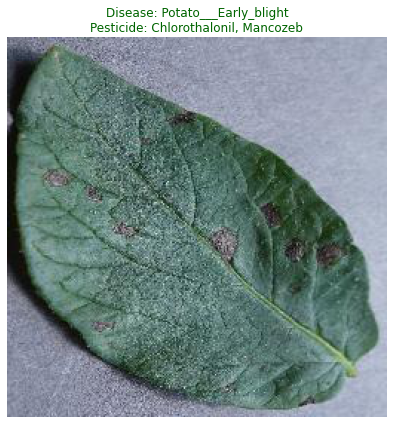

In [46]:
predict_disease_and_recommend("/kaggle/input/plant-diseases-dataset-mod/plant_disease_detection_mod/test/test/PotatoEarlyBlight3.JPG")


🖼️ Image saved to: /kaggle/working/prediction_output.png


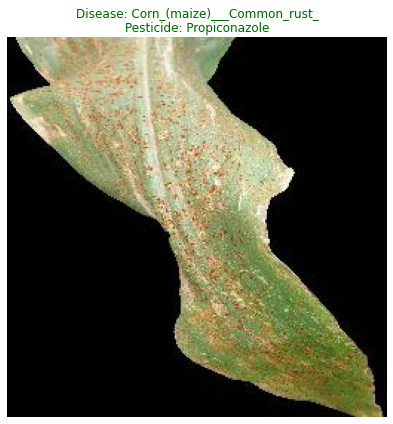

In [47]:
predict_disease_and_recommend("/kaggle/input/plant-diseases-dataset-mod/plant_disease_detection_mod/test/test/CornCommonRust3.JPG")